In [1]:
# import 목록
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pickle
pd.options.display.max_columns = None

In [2]:
# 컬럼 전체 보기 설정
# pd.options.display.max_columns = None

In [3]:
# csv 데이터 통합
customers = pd.read_csv('./dacon_data/open/customers.csv')
locations = pd.read_csv('./dacon_data/open/locations.csv')
orders = pd.read_csv('./dacon_data/open/orders.csv')
order_items = pd.read_csv('./dacon_data/open/order_items.csv')
payments = pd.read_csv('./dacon_data/open/payments.csv')
products = pd.read_csv('./dacon_data/open/products.csv')
reviews = pd.read_csv('./dacon_data/open/reviews.csv')
sellers = pd.read_csv('./dacon_data/open/sellers.csv')
temp = pd.merge(reviews,order_items, how='inner',on='Order_id')
temp = pd.merge(temp,orders, how='inner',on='Order_id')
temp = pd.merge(temp,payments, how='inner',on='Order_id')
temp = pd.merge(temp,products, how='inner',on='Product_id')
temp = pd.merge(temp,customers, how='inner',on='Customer_id')
temp = pd.merge(temp,sellers, how='inner',on='Seller_id')

In [4]:
temp.shape

(104956, 32)

In [5]:
# group별 Payment_value 합산 
# 컬럼 제외: Payment_sequential, Product_weight_g, Product_length_cm, Product_height_cm, Product_width_cm
tmp1 = temp.groupby(['Review_id', 'Order_id', 'Review_score', 'Review_creation_date', 'Review_answer_timestamp', 'Order_item_id', 'Product_id', 'Seller_id', 
                    'Price', 'Freight_value', 'Customer_id', 'Order_status', 'Order_purchase_timestamp', 'Order_delivered_carrier_date', 'Order_delivered_customer_date', 
                    'Order_estimated_delivery_date', 'Payment_type', 'Payment_installments', 'Product_category_name', 'Customer_unique_id', 'Customer_zipcode_prefix', 
                    'Customer_city', 'Customer_state', 'Seller_zipcode_prefix', 'Seller_city', 'Seller_state'],as_index=False)[['Payment_value']].sum()

tmp1


,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Order_item_id,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,Payment_value
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,1,PRODUCT_21853,SELLER_0286,185.00,13.63,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,credit_card,8,sports_leisure,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,397.26
1,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,2,PRODUCT_21853,SELLER_0286,185.00,13.63,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,credit_card,8,sports_leisure,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,397.26
2,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13,1,PRODUCT_18124,SELLER_0262,79.79,8.30,CUSTOMER_81808,delivered,2019-02-28 12:25:19,2019-03-02 19:08:15,2019-03-09 23:17:20,2019-03-14,credit_card,1,computers_accessories,CUSTOMER_Unique_79322,13380,nova odessa,SP,12233,sao jose dos campos,SP,88.09
3,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24,1,PRODUCT_07372,SELLER_2445,149.00,45.12,CUSTOMER_27108,delivered,2019-02-03 09:56:22,2019-02-06 16:18:28,2019-02-16 17:28:48,2019-03-09,credit_card,1,computers_accessories,CUSTOMER_Unique_26812,44571,santo antonio de jesus,BA,37175,ilicinea,MG,194.12
4,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06,1,PRODUCT_22159,SELLER_2445,179.99,42.85,CUSTOMER_62103,delivered,2018-04-09 17:41:13,2018-04-10 14:24:47,2018-04-20 09:08:35,2018-05-10,credit_card,1,garden_tools,CUSTOMER_Unique_60663,88735,gravatal,SC,37175,ilicinea,MG,222.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102834,REVIEW_87298,ORDER_58840,5,2019-07-07 00:00:00,2019-07-14 17:18:30,1,PRODUCT_25263,SELLER_0766,226.77,61.20,CUSTOMER_06636,delivered,2019-06-27 17:31:29,2019-06-29 14:25:00,2019-07-06 13:22:37,2019-07-20,credit_card,8,furniture_decor,CUSTOMER_Unique_06622,74810,goiania,GO,9270,santo andre,SP,287.97
102835,REVIEW_87299,ORDER_75162,5,2018-12-09 00:00:00,2018-12-11 20:06:42,1,PRODUCT_03024,SELLER_2634,199.99,9.77,CUSTOMER_48218,delivered,2018-12-03 21:45:23,2018-12-07 19:17:29,2018-12-08 17:19:00,2018-12-20,credit_card,1,toys,CUSTOMER_Unique_47339,22793,rio de janeiro,RJ,22240,rio de janeiro,RJ,209.76
102836,REVIEW_87300,ORDER_08690,5,2019-03-22 00:00:00,2019-03-23 09:10:43,1,PRODUCT_24946,SELLER_1192,215.97,15.59,CUSTOMER_86112,delivered,2019-03-18 09:52:19,2019-03-19 23:51:29,2019-03-21 17:44:08,2019-04-06,credit_card,6,stationery,CUSTOMER_Unique_83387,37200,lavras,MG,32677,betim,MG,231.56
102837,REVIEW_87301,ORDER_25681,4,2019-07-01 00:00:00,2019-07-02 12:59:13,1,PRODUCT_20058,SELLER_0642,50.95,15.46,CUSTOMER_54637,delivered,2019-06-22 16:47:28,2019-06-25 12:58:00,2019-06-30 12:57:51,2019-07-16,credit_card,1,sports_leisure,CUSTOMER_Unique_53535,32667,betim,MG,9780,sao bernardo do campo,SP,66.41


In [6]:
# 동일한 데이터 Order_item_id 카운트 # 컬럼 제외 : Payment_value  -> Price + Freight_value
tmp2 = tmp1.groupby(['Review_id', 'Order_id', 'Review_score', 'Review_creation_date', 'Review_answer_timestamp', 'Product_id', 'Seller_id', 
                     'Price', 'Freight_value', 'Customer_id', 'Order_status', 'Order_purchase_timestamp', 'Order_delivered_carrier_date', 'Order_delivered_customer_date', 
                     'Order_estimated_delivery_date', 'Payment_type', 'Payment_installments', 'Product_category_name', 'Customer_unique_id', 'Customer_zipcode_prefix', 
                     'Customer_city', 'Customer_state', 'Seller_zipcode_prefix', 'Seller_city', 'Seller_state'],as_index=False).Order_item_id.count()

# 해당 group별 주문 건수
# 컬럼명 변경  Order_item_id -> order_count
tmp2 = tmp2.rename(columns={"Order_item_id" : "order_count"})

tmp2

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,PRODUCT_21853,SELLER_0286,185.00,13.63,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,credit_card,8,sports_leisure,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,2
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13,PRODUCT_18124,SELLER_0262,79.79,8.30,CUSTOMER_81808,delivered,2019-02-28 12:25:19,2019-03-02 19:08:15,2019-03-09 23:17:20,2019-03-14,credit_card,1,computers_accessories,CUSTOMER_Unique_79322,13380,nova odessa,SP,12233,sao jose dos campos,SP,1
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24,PRODUCT_07372,SELLER_2445,149.00,45.12,CUSTOMER_27108,delivered,2019-02-03 09:56:22,2019-02-06 16:18:28,2019-02-16 17:28:48,2019-03-09,credit_card,1,computers_accessories,CUSTOMER_Unique_26812,44571,santo antonio de jesus,BA,37175,ilicinea,MG,1
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06,PRODUCT_22159,SELLER_2445,179.99,42.85,CUSTOMER_62103,delivered,2018-04-09 17:41:13,2018-04-10 14:24:47,2018-04-20 09:08:35,2018-05-10,credit_card,1,garden_tools,CUSTOMER_Unique_60663,88735,gravatal,SC,37175,ilicinea,MG,1
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53,PRODUCT_19699,SELLER_1555,1199.00,134.25,CUSTOMER_57462,delivered,2019-02-10 10:59:03,2019-02-15 19:36:14,2019-02-28 16:33:35,2019-03-09,credit_card,10,sports_leisure,CUSTOMER_Unique_56232,89520,curitibanos,SC,81730,curitiba,PR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,REVIEW_87298,ORDER_58840,5,2019-07-07 00:00:00,2019-07-14 17:18:30,PRODUCT_25263,SELLER_0766,226.77,61.20,CUSTOMER_06636,delivered,2019-06-27 17:31:29,2019-06-29 14:25:00,2019-07-06 13:22:37,2019-07-20,credit_card,8,furniture_decor,CUSTOMER_Unique_06622,74810,goiania,GO,9270,santo andre,SP,1
93477,REVIEW_87299,ORDER_75162,5,2018-12-09 00:00:00,2018-12-11 20:06:42,PRODUCT_03024,SELLER_2634,199.99,9.77,CUSTOMER_48218,delivered,2018-12-03 21:45:23,2018-12-07 19:17:29,2018-12-08 17:19:00,2018-12-20,credit_card,1,toys,CUSTOMER_Unique_47339,22793,rio de janeiro,RJ,22240,rio de janeiro,RJ,1
93478,REVIEW_87300,ORDER_08690,5,2019-03-22 00:00:00,2019-03-23 09:10:43,PRODUCT_24946,SELLER_1192,215.97,15.59,CUSTOMER_86112,delivered,2019-03-18 09:52:19,2019-03-19 23:51:29,2019-03-21 17:44:08,2019-04-06,credit_card,6,stationery,CUSTOMER_Unique_83387,37200,lavras,MG,32677,betim,MG,1
93479,REVIEW_87301,ORDER_25681,4,2019-07-01 00:00:00,2019-07-02 12:59:13,PRODUCT_20058,SELLER_0642,50.95,15.46,CUSTOMER_54637,delivered,2019-06-22 16:47:28,2019-06-25 12:58:00,2019-06-30 12:57:51,2019-07-16,credit_card,1,sports_leisure,CUSTOMER_Unique_53535,32667,betim,MG,9780,sao bernardo do campo,SP,1


In [7]:
# tmp2 데이터 저장 
with open('./dacon_total_df_20240503_00.pkl', 'wb') as f:
    pickle.dump(tmp2, f)

In [8]:
# df 데이터 불러오기 
with open('./dacon_total_df_20240503_00.pkl', 'rb') as f:
    df = pickle.load(f)

In [9]:
df

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count
0,REVIEW_00000,ORDER_01674,4,2019-01-18 00:00:00,2019-01-18 21:46:59,PRODUCT_21853,SELLER_0286,185.00,13.63,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,credit_card,8,sports_leisure,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,2
1,REVIEW_00001,ORDER_80140,5,2019-03-10 00:00:00,2019-03-11 03:05:13,PRODUCT_18124,SELLER_0262,79.79,8.30,CUSTOMER_81808,delivered,2019-02-28 12:25:19,2019-03-02 19:08:15,2019-03-09 23:17:20,2019-03-14,credit_card,1,computers_accessories,CUSTOMER_Unique_79322,13380,nova odessa,SP,12233,sao jose dos campos,SP,1
2,REVIEW_00002,ORDER_69816,5,2019-02-17 00:00:00,2019-02-18 14:36:24,PRODUCT_07372,SELLER_2445,149.00,45.12,CUSTOMER_27108,delivered,2019-02-03 09:56:22,2019-02-06 16:18:28,2019-02-16 17:28:48,2019-03-09,credit_card,1,computers_accessories,CUSTOMER_Unique_26812,44571,santo antonio de jesus,BA,37175,ilicinea,MG,1
3,REVIEW_00003,ORDER_24398,5,2018-04-21 00:00:00,2018-04-21 22:02:06,PRODUCT_22159,SELLER_2445,179.99,42.85,CUSTOMER_62103,delivered,2018-04-09 17:41:13,2018-04-10 14:24:47,2018-04-20 09:08:35,2018-05-10,credit_card,1,garden_tools,CUSTOMER_Unique_60663,88735,gravatal,SC,37175,ilicinea,MG,1
4,REVIEW_00004,ORDER_70366,5,2019-03-01 00:00:00,2019-03-02 10:26:53,PRODUCT_19699,SELLER_1555,1199.00,134.25,CUSTOMER_57462,delivered,2019-02-10 10:59:03,2019-02-15 19:36:14,2019-02-28 16:33:35,2019-03-09,credit_card,10,sports_leisure,CUSTOMER_Unique_56232,89520,curitibanos,SC,81730,curitiba,PR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,REVIEW_87298,ORDER_58840,5,2019-07-07 00:00:00,2019-07-14 17:18:30,PRODUCT_25263,SELLER_0766,226.77,61.20,CUSTOMER_06636,delivered,2019-06-27 17:31:29,2019-06-29 14:25:00,2019-07-06 13:22:37,2019-07-20,credit_card,8,furniture_decor,CUSTOMER_Unique_06622,74810,goiania,GO,9270,santo andre,SP,1
93477,REVIEW_87299,ORDER_75162,5,2018-12-09 00:00:00,2018-12-11 20:06:42,PRODUCT_03024,SELLER_2634,199.99,9.77,CUSTOMER_48218,delivered,2018-12-03 21:45:23,2018-12-07 19:17:29,2018-12-08 17:19:00,2018-12-20,credit_card,1,toys,CUSTOMER_Unique_47339,22793,rio de janeiro,RJ,22240,rio de janeiro,RJ,1
93478,REVIEW_87300,ORDER_08690,5,2019-03-22 00:00:00,2019-03-23 09:10:43,PRODUCT_24946,SELLER_1192,215.97,15.59,CUSTOMER_86112,delivered,2019-03-18 09:52:19,2019-03-19 23:51:29,2019-03-21 17:44:08,2019-04-06,credit_card,6,stationery,CUSTOMER_Unique_83387,37200,lavras,MG,32677,betim,MG,1
93479,REVIEW_87301,ORDER_25681,4,2019-07-01 00:00:00,2019-07-02 12:59:13,PRODUCT_20058,SELLER_0642,50.95,15.46,CUSTOMER_54637,delivered,2019-06-22 16:47:28,2019-06-25 12:58:00,2019-06-30 12:57:51,2019-07-16,credit_card,1,sports_leisure,CUSTOMER_Unique_53535,32667,betim,MG,9780,sao bernardo do campo,SP,1


In [10]:
df[df.Order_id == 'ORDER_68748']

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count
61904,REVIEW_57660,ORDER_68748,5,2018-06-23 00:00:00,2018-06-28 18:49:50,PRODUCT_11331,SELLER_2669,49.99,12.69,CUSTOMER_52719,delivered,2018-06-07 12:05:10,2018-06-16 15:50:28,2018-06-22 16:04:46,2018-06-28,credit_card,1,bed_bath_table,CUSTOMER_Unique_51679,3266,sao paulo,SP,14940,ibitinga,SP,1
61905,REVIEW_57660,ORDER_68748,5,2018-06-23 00:00:00,2018-06-28 18:49:50,PRODUCT_11331,SELLER_2669,49.99,12.69,CUSTOMER_52719,delivered,2018-06-07 12:05:10,2018-06-16 15:50:28,2018-06-22 16:04:46,2018-06-28,voucher,1,bed_bath_table,CUSTOMER_Unique_51679,3266,sao paulo,SP,14940,ibitinga,SP,1


In [12]:
df4[df4.Order_id == 'ORDER_68748']

NameError: name 'df4' is not defined

In [183]:
df4.groupby(['Customer_unique_id'])[['order_count']].count()

,order_count
Customer_unique_id,
CUSTOMER_Unique_00000,1
CUSTOMER_Unique_00001,1
CUSTOMER_Unique_00002,1
CUSTOMER_Unique_00003,1
CUSTOMER_Unique_00004,2
...,...
CUSTOMER_Unique_85234,1
CUSTOMER_Unique_85235,1
CUSTOMER_Unique_85236,1


In [27]:
# 복사본 사용
df2 = df.copy()

In [28]:
# 데이터별 타입 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Review_id                      93481 non-null  object 
 1   Order_id                       93481 non-null  object 
 2   Review_score                   93481 non-null  int64  
 3   Review_creation_date           93481 non-null  object 
 4   Review_answer_timestamp        93481 non-null  object 
 5   Product_id                     93481 non-null  object 
 6   Seller_id                      93481 non-null  object 
 7   Price                          93481 non-null  float64
 8   Freight_value                  93481 non-null  float64
 9   Customer_id                    93481 non-null  object 
 10  Order_status                   93481 non-null  object 
 11  Order_purchase_timestamp       93481 non-null  object 
 12  Order_delivered_carrier_date   93481 non-null 

In [29]:
# object -> datetime 타입 변경
df2.Review_creation_date = pd.to_datetime(df2.Review_creation_date)
df2.Review_answer_timestamp = pd.to_datetime(df2.Review_answer_timestamp)
df2.Order_purchase_timestamp = pd.to_datetime(df2.Order_purchase_timestamp)
df2.Order_delivered_carrier_date = pd.to_datetime(df2.Order_delivered_carrier_date)
df2.Order_delivered_customer_date = pd.to_datetime(df2.Order_delivered_customer_date)
df2.Order_estimated_delivery_date = pd.to_datetime(df2.Order_estimated_delivery_date)

In [30]:
# datetime 변경 확인
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93481 entries, 0 to 93480
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Review_id                      93481 non-null  object        
 1   Order_id                       93481 non-null  object        
 2   Review_score                   93481 non-null  int64         
 3   Review_creation_date           93481 non-null  datetime64[ns]
 4   Review_answer_timestamp        93481 non-null  datetime64[ns]
 5   Product_id                     93481 non-null  object        
 6   Seller_id                      93481 non-null  object        
 7   Price                          93481 non-null  float64       
 8   Freight_value                  93481 non-null  float64       
 9   Customer_id                    93481 non-null  object        
 10  Order_status                   93481 non-null  object        
 11  Order_purchase_

In [31]:
# 구매 시간 데이터 기준 연,월,분기 데이터 컬럼 추가
df2['Order_purchase_year'] = df2.Order_purchase_timestamp.dt.year
df2['Order_purchase_month'] = df2.Order_purchase_timestamp.dt.month
df2['Order_purchase_quarter'] = df2.Order_purchase_timestamp.dt.quarter

In [32]:
df2

,Review_id,Order_id,Review_score,Review_creation_date,Review_answer_timestamp,Product_id,Seller_id,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_year,Order_purchase_month,Order_purchase_quarter
0,REVIEW_00000,ORDER_01674,4,2019-01-18,2019-01-18 21:46:59,PRODUCT_21853,SELLER_0286,185.00,13.63,CUSTOMER_38995,delivered,2019-01-11 15:30:49,2019-01-12 21:57:22,2019-01-17 18:42:41,2019-02-02,credit_card,8,sports_leisure,CUSTOMER_Unique_38397,6030,osasco,SP,14600,sao joaquim da barra,SP,2,2019,1,1
1,REVIEW_00001,ORDER_80140,5,2019-03-10,2019-03-11 03:05:13,PRODUCT_18124,SELLER_0262,79.79,8.30,CUSTOMER_81808,delivered,2019-02-28 12:25:19,2019-03-02 19:08:15,2019-03-09 23:17:20,2019-03-14,credit_card,1,computers_accessories,CUSTOMER_Unique_79322,13380,nova odessa,SP,12233,sao jose dos campos,SP,1,2019,2,1
2,REVIEW_00002,ORDER_69816,5,2019-02-17,2019-02-18 14:36:24,PRODUCT_07372,SELLER_2445,149.00,45.12,CUSTOMER_27108,delivered,2019-02-03 09:56:22,2019-02-06 16:18:28,2019-02-16 17:28:48,2019-03-09,credit_card,1,computers_accessories,CUSTOMER_Unique_26812,44571,santo antonio de jesus,BA,37175,ilicinea,MG,1,2019,2,1
3,REVIEW_00003,ORDER_24398,5,2018-04-21,2018-04-21 22:02:06,PRODUCT_22159,SELLER_2445,179.99,42.85,CUSTOMER_62103,delivered,2018-04-09 17:41:13,2018-04-10 14:24:47,2018-04-20 09:08:35,2018-05-10,credit_card,1,garden_tools,CUSTOMER_Unique_60663,88735,gravatal,SC,37175,ilicinea,MG,1,2018,4,2
4,REVIEW_00004,ORDER_70366,5,2019-03-01,2019-03-02 10:26:53,PRODUCT_19699,SELLER_1555,1199.00,134.25,CUSTOMER_57462,delivered,2019-02-10 10:59:03,2019-02-15 19:36:14,2019-02-28 16:33:35,2019-03-09,credit_card,10,sports_leisure,CUSTOMER_Unique_56232,89520,curitibanos,SC,81730,curitiba,PR,1,2019,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93476,REVIEW_87298,ORDER_58840,5,2019-07-07,2019-07-14 17:18:30,PRODUCT_25263,SELLER_0766,226.77,61.20,CUSTOMER_06636,delivered,2019-06-27 17:31:29,2019-06-29 14:25:00,2019-07-06 13:22:37,2019-07-20,credit_card,8,furniture_decor,CUSTOMER_Unique_06622,74810,goiania,GO,9270,santo andre,SP,1,2019,6,2
93477,REVIEW_87299,ORDER_75162,5,2018-12-09,2018-12-11 20:06:42,PRODUCT_03024,SELLER_2634,199.99,9.77,CUSTOMER_48218,delivered,2018-12-03 21:45:23,2018-12-07 19:17:29,2018-12-08 17:19:00,2018-12-20,credit_card,1,toys,CUSTOMER_Unique_47339,22793,rio de janeiro,RJ,22240,rio de janeiro,RJ,1,2018,12,4
93478,REVIEW_87300,ORDER_08690,5,2019-03-22,2019-03-23 09:10:43,PRODUCT_24946,SELLER_1192,215.97,15.59,CUSTOMER_86112,delivered,2019-03-18 09:52:19,2019-03-19 23:51:29,2019-03-21 17:44:08,2019-04-06,credit_card,6,stationery,CUSTOMER_Unique_83387,37200,lavras,MG,32677,betim,MG,1,2019,3,1
93479,REVIEW_87301,ORDER_25681,4,2019-07-01,2019-07-02 12:59:13,PRODUCT_20058,SELLER_0642,50.95,15.46,CUSTOMER_54637,delivered,2019-06-22 16:47:28,2019-06-25 12:58:00,2019-06-30 12:57:51,2019-07-16,credit_card,1,sports_leisure,CUSTOMER_Unique_53535,32667,betim,MG,9780,sao bernardo do campo,SP,1,2019,6,2


In [33]:
# 연,분기별 기준 데이터 정렬
df3_dt = df2.groupby(['Order_id','Product_id','Seller_id', 'Order_purchase_year','Order_purchase_month'],as_index=False).value_counts().sort_values(['Order_purchase_year','Order_purchase_quarter'])
df3_dt

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,count
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,1
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4,1
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4,1
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4,1
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3,1
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3,1
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3,1
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3,1


In [36]:
# 그룹화된 파일 찾기
df3_dt[df3_dt['count'] > 1]

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,count


In [40]:
# count 컬럼 제거
df3_dt.drop(columns='count', inplace=True)

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3


In [41]:
df3_dt[df3_dt[['Order_id','Product_id','Seller_id']].duplicated()]

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter
30119,ORDER_28375,PRODUCT_26452,SELLER_1546,2017,10,REVIEW_80533,1,2017-11-18,2017-11-28 12:30:30,59.90,11.31,CUSTOMER_72311,delivered,2017-10-05 08:04:21,2017-11-11 07:31:31,2017-11-17 16:23:47,2017-11-25,voucher,1,health_beauty,CUSTOMER_Unique_70361,83045,sao jose dos pinhais,PR,81810,curitiba,PR,1,4
37154,ORDER_35023,PRODUCT_28118,SELLER_1269,2017,10,REVIEW_53226,5,2017-11-18,2017-11-20 11:23:13,379.98,35.70,CUSTOMER_38636,delivered,2017-10-07 21:30:12,2017-11-11 09:57:36,2017-11-16 23:47:37,2017-11-29,voucher,1,pet_shop,CUSTOMER_Unique_38052,11015,santos,SP,14784,barretos,SP,1,4
49511,ORDER_46702,PRODUCT_10561,SELLER_2595,2017,10,REVIEW_62625,5,2017-10-29,2017-10-31 20:00:13,28.90,14.11,CUSTOMER_35026,delivered,2017-10-10 15:49:59,2017-10-21 18:22:31,2017-10-28 14:43:41,2017-12-02,credit_card,10,furniture_decor,CUSTOMER_Unique_04307,30411,belo horizonte,MG,8072,sao paulo,SP,3,4
59301,ORDER_55932,PRODUCT_04024,SELLER_1670,2017,10,REVIEW_15860,5,2017-10-20,2017-10-21 18:07:23,119.90,15.01,CUSTOMER_42078,delivered,2017-10-08 15:42:14,2017-10-12 18:54:23,2017-10-15 18:54:23,2017-12-02,voucher,1,computers_accessories,CUSTOMER_Unique_41400,37478,soledade de minas,MG,13690,descalvado,SP,1,4
64443,ORDER_60749,PRODUCT_15095,SELLER_2490,2017,10,REVIEW_40847,4,2017-10-22,2017-10-22 21:10:00,35.00,16.05,CUSTOMER_46119,delivered,2017-10-09 11:33:12,2017-10-15 10:09:46,2017-10-21 21:17:53,2017-12-06,voucher,1,computers_accessories,CUSTOMER_Unique_45308,98290,condor,RS,11010,santos,SP,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90126,ORDER_84960,PRODUCT_13615,SELLER_1678,2019,7,REVIEW_13014,5,2019-07-25,2019-07-25 15:07:11,149.90,23.85,CUSTOMER_74680,delivered,2019-07-17 21:29:23,2019-07-18 14:42:00,2019-07-24 11:36:25,2019-08-03,voucher,1,bed_bath_table,CUSTOMER_Unique_72598,25720,petropolis,RJ,13405,piracicaba,SP,1,3
90362,ORDER_85181,PRODUCT_27867,SELLER_0783,2019,7,REVIEW_67276,5,2019-07-12,2019-07-12 19:10:08,55.00,13.97,CUSTOMER_73002,delivered,2019-07-04 17:30:53,2019-07-05 13:17:00,2019-07-11 15:28:59,2019-07-25,voucher,1,watches_gifts,CUSTOMER_Unique_71010,17560,vera cruz,SP,13930,serra negra,SP,1,3
92320,ORDER_87008,PRODUCT_27360,SELLER_2669,2019,7,REVIEW_50503,3,2019-07-12,2019-07-13 10:43:22,43.99,19.50,CUSTOMER_45545,delivered,2019-07-02 10:30:55,2019-07-03 13:56:00,2019-07-11 18:51:27,2019-07-26,voucher,1,bed_bath_table,CUSTOMER_Unique_44753,89036,blumenau,SC,14940,ibitinga,SP,1,3
92485,ORDER_87153,PRODUCT_17728,SELLER_0642,2019,7,REVIEW_03478,4,2019-07-14,2019-07-14 22:45:54,22.49,18.26,CUSTOMER_14643,delivered,2019-07-07 18:35:06,2019-07-10 14:07:00,2019-07-13 15:07:29,2019-07-26,voucher,1,computers_accessories,CUSTOMER_Unique_14552,29304,cachoeiro de itapemirim,ES,9780,sao bernardo do campo,SP,1,3


In [42]:
# 중복되지 않는 데이터 재조회
df3_dt[~df3_dt[['Order_id','Product_id','Seller_id','Order_purchase_year','Order_purchase_month','Customer_id']].duplicated()]

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3


In [43]:
df4 = df3_dt[~df3_dt[['Order_id','Product_id','Seller_id','Order_purchase_year','Order_purchase_month','Customer_id']].duplicated()]
df4

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3


In [46]:
df4['순이익'] = df4['Price'] * df4['order_count']
df4['매출액'] = (df4['Price'] + df4['Freight_value']) * df4['order_count']
df4

C:\Users\sh022\AppData\Local\Temp\ipykernel_14204\2253686523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['순이익'] = df4['Price'] * df4['order_count']
C:\Users\sh022\AppData\Local\Temp\ipykernel_14204\2253686523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['매출액'] = (df4['Price'] + df4['Freight_value']) * df4['order_count']


,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,75.00,95.58
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4,294.90,315.24
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4,93.90,111.51
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4,134.70,181.59
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4,79.80,108.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3,24.90,40.17
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3,70.00,83.32
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3,40.99,55.59
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3,31.50,53.65


In [47]:
import pickle
with open('./dacon_total_df_20240504_01.pkl', 'wb') as f:
    pickle.dump(df4, f)

In [51]:
# df4와 비교를 위해 Order_item_id 확인
order_items[order_items.Order_id == 'ORDER_78678']

,Order_id,Order_item_id,Product_id,Seller_id,Price,Freight_value
51184,ORDER_78678,1,PRODUCT_02443,SELLER_2467,1.2,7.89
51185,ORDER_78678,2,PRODUCT_14477,SELLER_2467,1.2,7.89
51186,ORDER_78678,3,PRODUCT_14477,SELLER_2467,1.2,7.89
51187,ORDER_78678,4,PRODUCT_14477,SELLER_2467,1.2,7.89
51188,ORDER_78678,5,PRODUCT_14477,SELLER_2467,1.2,7.89
51189,ORDER_78678,6,PRODUCT_14477,SELLER_2467,1.2,7.89
51190,ORDER_78678,7,PRODUCT_14477,SELLER_2467,1.2,7.89
51191,ORDER_78678,8,PRODUCT_14477,SELLER_2467,1.2,7.89
51192,ORDER_78678,9,PRODUCT_14477,SELLER_2467,1.2,7.89
51193,ORDER_78678,10,PRODUCT_14477,SELLER_2467,1.2,7.89


In [52]:
# order_count 데이터 확인. 21로 갯수 같음
# 다른 값: Product_id, Price, Freight_value 
df4[df4.Order_id == 'ORDER_78678']

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액
83440,ORDER_78678,PRODUCT_01748,SELLER_2467,2018,7,REVIEW_13311,1,2018-07-30,2018-07-30 14:19:07,7.8,6.57,CUSTOMER_41712,delivered,2018-07-16 18:19:25,2018-07-20 15:45:53,2018-07-31 18:03:02,2018-07-28,credit_card,2,health_beauty,CUSTOMER_Unique_41048,5882,sao paulo,SP,3813,sao paulo,SP,1,3,7.8,14.37
83441,ORDER_78678,PRODUCT_02443,SELLER_2467,2018,7,REVIEW_13311,1,2018-07-30,2018-07-30 14:19:07,1.2,7.89,CUSTOMER_41712,delivered,2018-07-16 18:19:25,2018-07-20 15:45:53,2018-07-31 18:03:02,2018-07-28,credit_card,2,health_beauty,CUSTOMER_Unique_41048,5882,sao paulo,SP,3813,sao paulo,SP,10,3,12.0,90.90
83442,ORDER_78678,PRODUCT_14477,SELLER_2467,2018,7,REVIEW_13311,1,2018-07-30,2018-07-30 14:19:07,1.2,7.89,CUSTOMER_41712,delivered,2018-07-16 18:19:25,2018-07-20 15:45:53,2018-07-31 18:03:02,2018-07-28,credit_card,2,health_beauty,CUSTOMER_Unique_41048,5882,sao paulo,SP,3813,sao paulo,SP,10,3,12.0,90.90


In [55]:
연도별_주문건수 = df4[['Order_purchase_year','Order_purchase_quarter']].value_counts().reset_index().sort_values(by=['Order_purchase_year','Order_purchase_quarter']).reset_index(drop=True)
연도별_주문건수

,Order_purchase_year,Order_purchase_quarter,count
0,2017,4,278
1,2018,1,5067
2,2018,2,9233
3,2018,3,12577
4,2018,4,17858
5,2019,1,21158
6,2019,2,20212
7,2019,3,4263


In [85]:
df4

,Order_id,Product_id,Seller_id,Order_purchase_year,Order_purchase_month,Review_id,Review_score,Review_creation_date,Review_answer_timestamp,Price,Freight_value,Customer_id,Order_status,Order_purchase_timestamp,Order_delivered_carrier_date,Order_delivered_customer_date,Order_estimated_delivery_date,Payment_type,Payment_installments,Product_category_name,Customer_unique_id,Customer_zipcode_prefix,Customer_city,Customer_state,Seller_zipcode_prefix,Seller_city,Seller_state,order_count,Order_purchase_quarter,순이익,매출액
355,ORDER_00329,PRODUCT_07734,SELLER_0146,2017,10,REVIEW_65349,1,2017-10-21,2017-10-22 10:10:28,75.00,20.58,CUSTOMER_06208,delivered,2017-10-05 07:31:49,2017-10-10 02:46:24,2017-10-16 14:36:00,2017-12-07,boleto,1,computers_accessories,CUSTOMER_Unique_06197,50090,recife,PE,30190,belo horizonte,MG,1,4,75.00,95.58
666,ORDER_00616,PRODUCT_04278,SELLER_0914,2017,10,REVIEW_21396,1,2017-10-22,2017-10-24 23:33:19,294.90,20.34,CUSTOMER_77212,delivered,2017-10-05 15:08:00,2017-10-10 15:44:27,2017-10-13 15:44:27,2017-11-29,credit_card,10,automotive,CUSTOMER_Unique_74990,13610,leme,SP,86035,londrina,PR,1,4,294.90,315.24
1321,ORDER_01235,PRODUCT_23369,SELLER_1445,2017,10,REVIEW_50469,3,2017-10-25,2017-10-26 23:52:15,93.90,17.61,CUSTOMER_36496,delivered,2017-10-04 14:13:22,2017-10-08 14:46:49,2017-10-11 14:46:49,2017-11-30,credit_card,4,furniture_decor,CUSTOMER_Unique_35969,21853,rio de janeiro,RJ,87900,loanda,PR,1,4,93.90,111.51
1385,ORDER_01293,PRODUCT_04377,SELLER_2603,2017,10,REVIEW_75101,1,2017-10-27,2017-10-27 10:41:59,44.90,15.63,CUSTOMER_15399,delivered,2017-10-07 00:54:40,2017-10-25 11:35:52,2017-10-27 17:32:07,2017-12-01,boleto,1,perfumery,CUSTOMER_Unique_15296,21220,rio de janeiro,RJ,17510,marilia,SP,3,4,134.70,181.59
2230,ORDER_02078,PRODUCT_21531,SELLER_2660,2017,10,REVIEW_58071,4,2017-10-28,2018-01-08 15:09:32,39.90,14.52,CUSTOMER_77880,delivered,2017-10-05 13:12:43,2017-10-21 16:34:58,2017-10-27 12:33:29,2017-11-29,credit_card,10,telephony,CUSTOMER_Unique_75617,37704,pocos de caldas,MG,2969,sao paulo,SP,2,4,79.80,108.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93368,ORDER_87982,PRODUCT_29370,SELLER_0335,2019,7,REVIEW_24242,4,2019-07-13,2019-07-15 14:23:30,24.90,15.27,CUSTOMER_61945,delivered,2019-07-06 11:18:39,2019-07-09 08:58:00,2019-07-12 17:48:52,2019-07-25,credit_card,1,furniture_decor,CUSTOMER_Unique_60513,2050,sao paulo,SP,20270,rio de janeiro,RJ,1,3,24.90,40.17
93392,ORDER_88004,PRODUCT_02102,SELLER_1628,2019,7,REVIEW_72610,5,2019-07-28,2019-07-29 02:33:56,70.00,13.32,CUSTOMER_52088,delivered,2019-07-24 21:58:04,2019-07-26 11:28:00,2019-07-27 23:03:17,2019-08-01,boleto,1,furniture_decor,CUSTOMER_Unique_51078,82860,curitiba,PR,80330,curitiba,PR,1,3,70.00,83.32
93409,ORDER_88021,PRODUCT_22041,SELLER_1230,2019,7,REVIEW_55262,5,2019-07-26,2019-07-26 22:20:21,40.99,14.60,CUSTOMER_19304,delivered,2019-07-21 01:01:06,2019-07-23 16:13:00,2019-07-25 17:37:40,2019-08-06,credit_card,5,home_utilities,CUSTOMER_Unique_19150,13515,charqueada,SP,3275,sao paulo,SP,1,3,40.99,55.59
93424,ORDER_88035,PRODUCT_02524,SELLER_1627,2019,7,REVIEW_32238,5,2019-07-25,2019-07-26 01:32:39,31.50,22.15,CUSTOMER_15679,delivered,2019-07-14 20:17:16,2019-07-16 09:03:00,2019-07-24 19:18:59,2019-08-08,credit_card,5,health_beauty,CUSTOMER_Unique_15573,48030,alagoinhas,BA,3006,sao paulo,SP,1,3,31.50,53.65


In [93]:
월별_순이익 = df4.groupby(['Order_purchase_year','Order_purchase_month','Order_purchase_quarter'])[['순이익']].sum()
월별_매출액 = df4.groupby(['Order_purchase_year','Order_purchase_month','Order_purchase_quarter'])[['매출액']].sum()

In [100]:
with open('./월별_순이익.pkl', 'wb') as f:
    pickle.dump(월별_순이익,f)

In [107]:
월별_순이익.reset_index(inplace=True)

In [108]:
월별_순이익

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,순이익
0,2017,10,4,39657.51
1,2017,12,4,10.90
2,2018,1,1,110385.46
3,2018,2,1,231059.89
4,2018,3,1,353202.42
5,2018,4,2,338491.56
6,2018,5,2,484510.22
7,2018,6,2,419136.24
8,2018,7,3,475422.66
9,2018,8,3,548004.58


In [105]:
월별_매출액.reset_index(inplace=True)

In [109]:
월별_매출액

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,매출액
0,2017,10,4,45716.35
1,2017,12,4,19.62
2,2018,1,1,125863.67
3,2018,2,1,267527.58
4,2018,3,1,407783.02
5,2018,4,2,388083.75
6,2018,5,2,561400.04
7,2018,6,2,486828.10
8,2018,7,3,558946.88
9,2018,8,3,638219.13


In [112]:
# 매출 성장률(%) = (당기매출액 - 전기매출액) / 전기매출액 * 100
월별_매출액_증가율 = []
for x in range(len(월별_매출액)):
    if x == 0: 
        월별_매출액_증가율.append(0)
    else:       
        월별_매출액_증가율.append((월별_매출액.iloc[x]['매출액'] - 월별_매출액.iloc[x-1]['매출액']) / 월별_매출액.iloc[x-1]['매출액'] * 100)

In [114]:
월별_매출액['월별_매출액_증가율'] = 월별_매출액_증가율

In [122]:
월별_매출액

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,매출액,월별_매출액_증가율
0,2017,10,4,45716.35,0.000000
1,2017,12,4,19.62,-99.957083
2,2018,1,1,125863.67,641406.982671
3,2018,2,1,267527.58,112.553456
4,2018,3,1,407783.02,52.426535
5,2018,4,2,388083.75,-4.830822
6,2018,5,2,561400.04,44.659507
7,2018,6,2,486828.10,-13.283209
8,2018,7,3,558946.88,14.814013
9,2018,8,3,638219.13,14.182430


<Axes: xlabel='Order_purchase_year', ylabel='매출액'>

C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

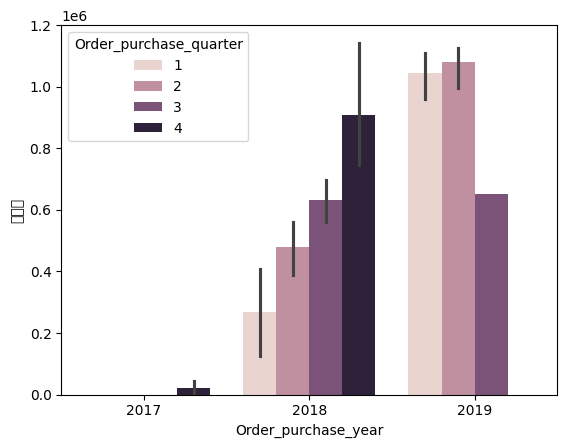

In [117]:
sns.barplot(월별_매출액, x="Order_purchase_year", y="매출액", hue="Order_purchase_quarter")

c:\Users\sh022\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sh022\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sh022\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\sh022\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.draw()
c:\Users\sh022\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) 

C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\sh022\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)

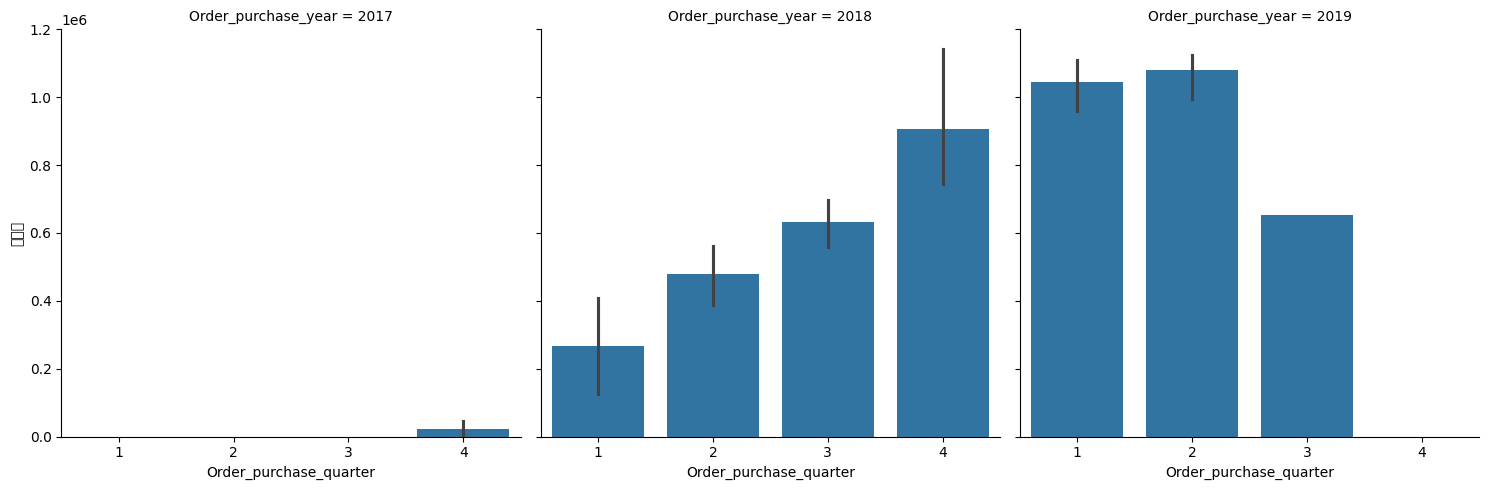

In [121]:
sns.catplot( data=월별_매출액, x="Order_purchase_quarter", y="매출액", col="Order_purchase_year",kind="bar")

In [123]:
with open('./월_분기별_매출액.pkl', 'wb') as f:
    pickle.dump(월별_매출액,f)

In [124]:
import pickle
with open('./월_분기별_매출액.pkl', 'rb') as f:
    분기별_매출액 = pickle.load(f)

In [125]:
분기별_매출액1 = 분기별_매출액.groupby(['Order_purchase_year', 'Order_purchase_quarter'])[['매출액']].sum().reset_index()
분기별_매출액1

,Order_purchase_year,Order_purchase_quarter,매출액
0,2017,4,45735.97
1,2018,1,801174.27
2,2018,2,1436311.89
3,2018,3,1893599.38
4,2018,4,2718376.49
5,2019,1,3135022.03
6,2019,2,3239050.65
7,2019,3,652168.01


In [140]:
분기별_매출액_증가율 = []
for x in range(len(분기별_매출액1)):
    if x == 0: 
        분기별_매출액_증가율.append(0)
    else:       
        분기별_매출액_증가율.append((분기별_매출액1.iloc[x]['매출액'] - 분기별_매출액1.iloc[x-1]['매출액']) / 분기별_매출액1.iloc[x-1]['매출액'] * 100)

In [148]:
분기별_매출액1['분기별_매출액_증가율'] = 분기별_매출액_증가율

In [149]:
분기별_매출액1

,Order_purchase_year,Order_purchase_quarter,매출액,분기별_매출액_증가율
0,2017,4,45735.97,0.000000
1,2018,1,801174.27,1651.737790
2,2018,2,1436311.89,79.275838
3,2018,3,1893599.38,31.837618
4,2018,4,2718376.49,43.556051
5,2019,1,3135022.03,15.326999
6,2019,2,3239050.65,3.318274
7,2019,3,652168.01,-79.865458


In [150]:
월_분기별_매출액 = 분기별_매출액.copy()

In [151]:
월_분기별_매출액

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,매출액,월별_매출액_증가율
0,2017,10,4,45716.35,0.000000
1,2017,12,4,19.62,-99.957083
2,2018,1,1,125863.67,641406.982671
3,2018,2,1,267527.58,112.553456
4,2018,3,1,407783.02,52.426535
5,2018,4,2,388083.75,-4.830822
6,2018,5,2,561400.04,44.659507
7,2018,6,2,486828.10,-13.283209
8,2018,7,3,558946.88,14.814013
9,2018,8,3,638219.13,14.182430


In [154]:
월_분기별_매출액1 = 분기별_매출액.merge(분기별_매출액1, how='inner', on=['Order_purchase_year','Order_purchase_quarter'])
월_분기별_매출액1 = 월_분기별_매출액1.rename(columns={'매출액_x':'월별_매출액', '매출액_y':'분기별_매출액'})

In [155]:
월_분기별_매출액1

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,월별_매출액,월별_매출액_증가율,분기별_매출액,분기별_매출액_증가율
0,2017,10,4,45716.35,0.000000,45735.97,0.000000
1,2017,12,4,19.62,-99.957083,45735.97,0.000000
2,2018,1,1,125863.67,641406.982671,801174.27,1651.737790
3,2018,2,1,267527.58,112.553456,801174.27,1651.737790
4,2018,3,1,407783.02,52.426535,801174.27,1651.737790
5,2018,4,2,388083.75,-4.830822,1436311.89,79.275838
6,2018,5,2,561400.04,44.659507,1436311.89,79.275838
7,2018,6,2,486828.10,-13.283209,1436311.89,79.275838
8,2018,7,3,558946.88,14.814013,1893599.38,31.837618
9,2018,8,3,638219.13,14.182430,1893599.38,31.837618


In [156]:
with open('./month_quarter_value','wb') as f:
    pickle.dump(월_분기별_매출액1,f)

In [157]:
with open('./month_quarter_value','rb') as f:
    test = pickle.load(f)

In [158]:
test

,Order_purchase_year,Order_purchase_month,Order_purchase_quarter,월별_매출액,월별_매출액_증가율,분기별_매출액,분기별_매출액_증가율
0,2017,10,4,45716.35,0.000000,45735.97,0.000000
1,2017,12,4,19.62,-99.957083,45735.97,0.000000
2,2018,1,1,125863.67,641406.982671,801174.27,1651.737790
3,2018,2,1,267527.58,112.553456,801174.27,1651.737790
4,2018,3,1,407783.02,52.426535,801174.27,1651.737790
5,2018,4,2,388083.75,-4.830822,1436311.89,79.275838
6,2018,5,2,561400.04,44.659507,1436311.89,79.275838
7,2018,6,2,486828.10,-13.283209,1436311.89,79.275838
8,2018,7,3,558946.88,14.814013,1893599.38,31.837618
9,2018,8,3,638219.13,14.182430,1893599.38,31.837618
